In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/My Drive/datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df = pd.read_csv(path+"/netflix.csv", sep=",")

**LIMPIEZA**

In [90]:
#ver columnas del df
col = df.columns
print(col)

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')


In [91]:
df.head(5)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517695.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1223453.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211879.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
3,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,444499.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1106519.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19682 non-null  object 
 1   type                20196 non-null  object 
 2   genres              19928 non-null  object 
 3   releaseYear         20181 non-null  float64
 4   imdbId              18887 non-null  object 
 5   imdbAverageRating   18734 non-null  float64
 6   imdbNumVotes        18734 non-null  float64
 7   availableCountries  20196 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.2+ MB


In [93]:
df.isnull().sum()

,0
title,514
type,0
genres,268
releaseYear,15
imdbId,1309
imdbAverageRating,1462
imdbNumVotes,1462
availableCountries,0


In [94]:
# Eliminamos las columnas innecesarias del df
df = df.drop(["imdbId", "availableCountries"], axis=1)

In [95]:
#filtramos las filas donde el título es nulo, como en esos registros muchos son nulos los eliminamos
df[df["title"].isnull()]

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
15541,NaN,tv,Comedy,1996.0,NaN,NaN
15675,NaN,tv,"Documentary, Comedy",2008.0,NaN,NaN
15680,NaN,tv,Reality,1979.0,NaN,NaN
15732,NaN,tv,"Animation, Family, Kids, Sci-Fi & Fantasy",1993.0,NaN,NaN
15751,NaN,tv,Documentary,2018.0,NaN,NaN
...,...,...,...,...,...,...
20190,NaN,tv,NaN,2009.0,NaN,NaN
20191,NaN,tv,NaN,2024.0,NaN,NaN
20192,NaN,tv,Drama,2024.0,NaN,NaN
20193,NaN,tv,"Animation, Action & Adventure",2016.0,NaN,NaN


In [96]:
#eliminamos las filas donde el título es nulo
df = df[df["title"].notnull()]

In [97]:
#reemplazamos los valores nulos en la columna genres por Unknown
df["genres"] = df["genres"].fillna("Unknown")

In [98]:
#reemplazamos los valores nulos en releaseYear por la mediana de la columna
median_year = df["releaseYear"].median()
df["releaseYear"] = df["releaseYear"].fillna(median_year)

In [99]:
#reemplazamos los valores nulos en imdbAverageRating y imdbNumVotes por sus medias
df["imdbAverageRating"] = df["imdbAverageRating"].fillna(df["imdbAverageRating"].mean())
df["imdbNumVotes"] = df["imdbNumVotes"].fillna(df["imdbNumVotes"].mean())

In [100]:
#las columnas que quedan son de interes
df.head()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,517695.0
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1223453.0
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,211879.0
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,444499.0
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1106519.0


In [101]:
#nos fijamos si quedan mas nulos
df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbAverageRating,0
imdbNumVotes,0


**EXPLORACION**

In [102]:
#calculamos el promedio y la mediana del año de lanzamiento
promedio_año = df["releaseYear"].mean()
mediana_año = df["releaseYear"].median()
print(f"Promedio de Año de Lanzamiento: {promedio_año}")
print(f"Mediana de Año de Lanzamiento: {mediana_año}")

Promedio de Año de Lanzamiento: 2012.7675033025098
Mediana de Año de Lanzamiento: 2018.0


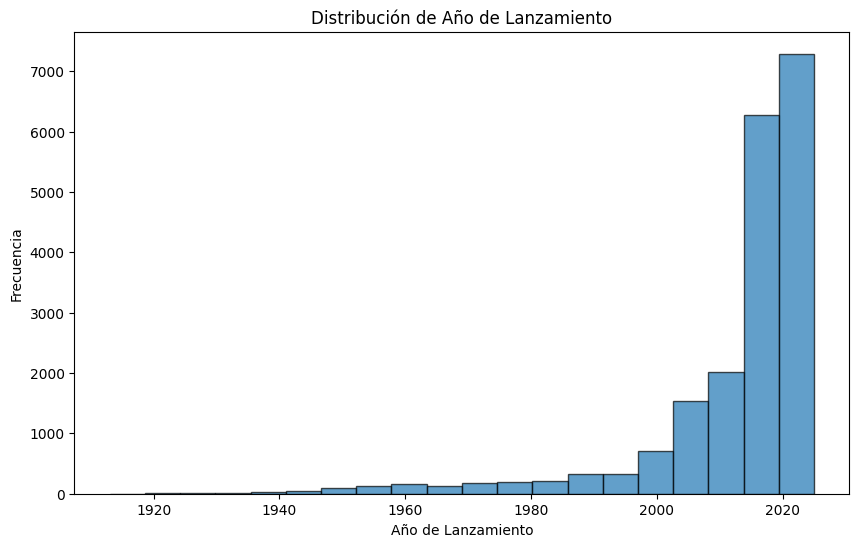

In [103]:
#creamos un histograma de la distribución del año de lanzamiento
plt.figure(figsize=(10, 6))
df["releaseYear"].plot(kind="hist", bins=20, edgecolor="black", alpha=0.7)

plt.title("Distribución de Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

In [104]:
#calculamos el promedio y la mediana del rating de IMDb
promedio_rating = df["imdbAverageRating"].mean()
mediana_rating = df["imdbAverageRating"].median()
print(f"Promedio de Rating IMDb: {promedio_rating}")
print(f"Mediana de Rating IMDb: {mediana_rating}")

Promedio de Rating IMDb: 6.399663713035124
Mediana de Rating IMDb: 6.4


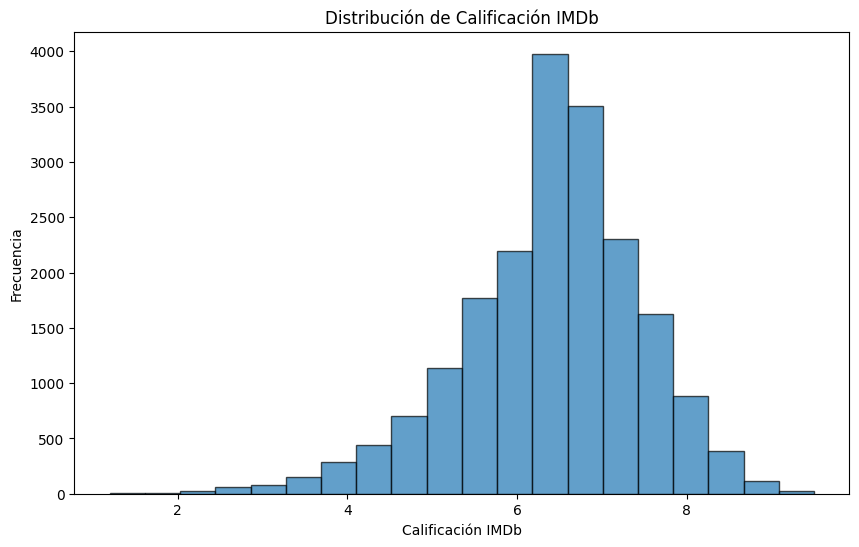

In [105]:
#creamos un histograma de la distribución de la calificación IMDb
plt.figure(figsize=(10, 6))
df["imdbAverageRating"].plot(kind="hist", bins=20, edgecolor="black", alpha=0.7)

plt.title("Distribución de Calificación IMDb")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia")
plt.show()

In [106]:
#calculamos el promedio y la mediana del número de votos en IMDb
promedio_votos = df["imdbNumVotes"].mean()
mediana_votos = df["imdbNumVotes"].median()
print(f"Promedio de Número de Votos IMDb: {promedio_votos}")
print(f"Mediana de Número de Votos IMDb: {mediana_votos}")

Promedio de Número de Votos IMDb: 32015.501387850967
Mediana de Número de Votos IMDb: 1912.0


In [107]:
#vemos la distribución del tipo de contenido
frecuencia_tipo = df["type"].value_counts()
print(f"Distribución de tipo de contenido: {frecuencia_tipo}")

Distribución de tipo de contenido: type
movie    15541
tv        4141
Name: count, dtype: int64


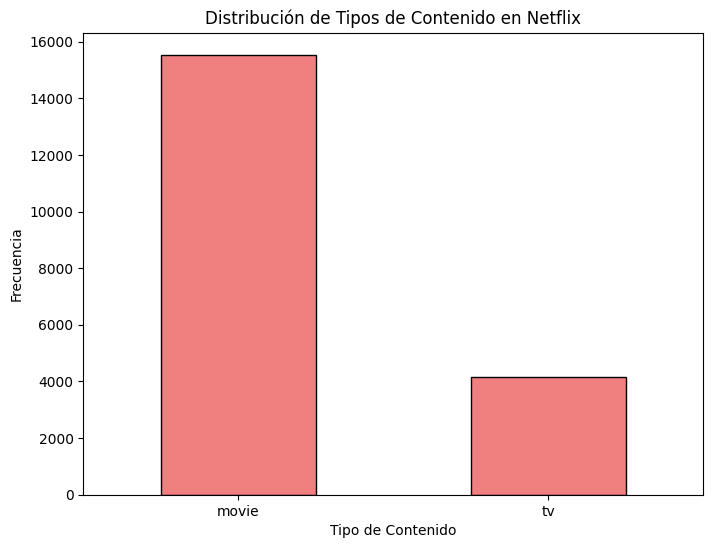

In [108]:
#creamos un gráfico de barras para la distribución de los tipos de contenido
plt.figure(figsize=(8, 6))
frecuencia_tipo.plot(kind="bar", color="lightcoral", edgecolor="black")

plt.title("Distribución de Tipos de Contenido en Netflix")
plt.xlabel("Tipo de Contenido")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

In [109]:
#calculamos el género más común en el dataset
generos = df["genres"].str.split(",", expand=True).stack().str.strip().value_counts()

genero_mas_comun = generos.idxmax()
print(f"Género más común: {genero_mas_comun}")

Género más común: Drama


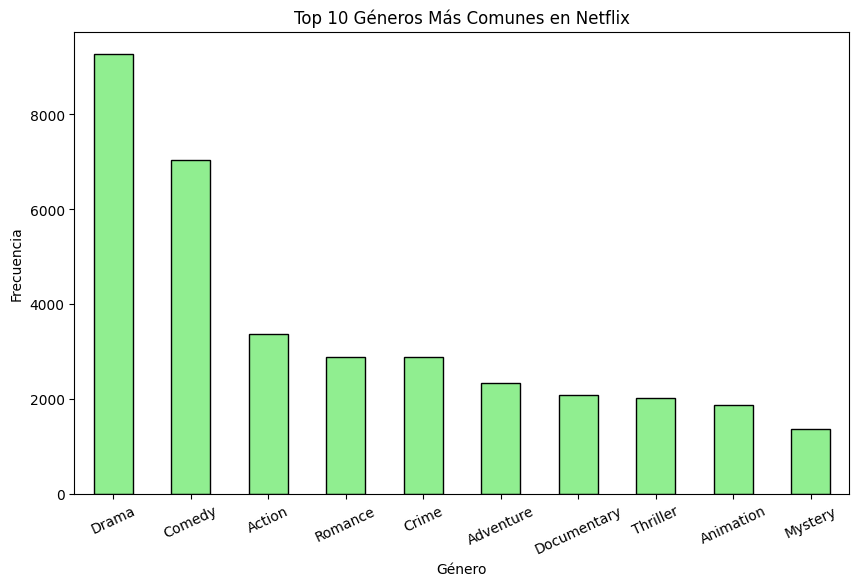

In [110]:
#creamos un gráfico de barras para los 10 géneros más comunes
plt.figure(figsize=(10, 6))
generos.head(10).plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("Top 10 Géneros Más Comunes en Netflix")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation=25)
plt.show()

In [111]:
#creamos un DataFrame para calcular el promedio de rating por género
generos_rating = df["genres"].str.split(",", expand=True).stack().str.strip()
generos_rating = generos_rating.reset_index(level=1, drop=True)
generos_rating_df = pd.DataFrame({"genero": generos_rating, "rating": df["imdbAverageRating"].repeat(generos_rating.groupby(level=0).size())})
promedio_rating_genero = generos_rating_df.groupby("genero")["rating"].mean()
print(promedio_rating_genero)

genero
Action             6.362899
Adult              6.399664
Adventure          6.446031
Animation          6.783630
Biography          6.927186
Comedy             6.217423
Crime              6.497984
Documentary        6.886588
Drama              6.566216
Family             6.177701
Fantasy            6.376207
Film-Noir          6.540000
Game-Show          6.580682
History            6.870149
Horror             5.660088
Music              6.611073
Musical            6.061133
Mystery            6.305754
News               6.679966
Reality-TV         6.349842
Romance            6.364661
Sci-Fi             6.130101
Science Fiction    6.399664
Short              6.546625
Sport              6.733170
TV Movie           6.379686
Talk-Show          6.802768
Thriller           6.100782
Unknown            6.399664
War                6.701438
Western            6.454822
Name: rating, dtype: float64


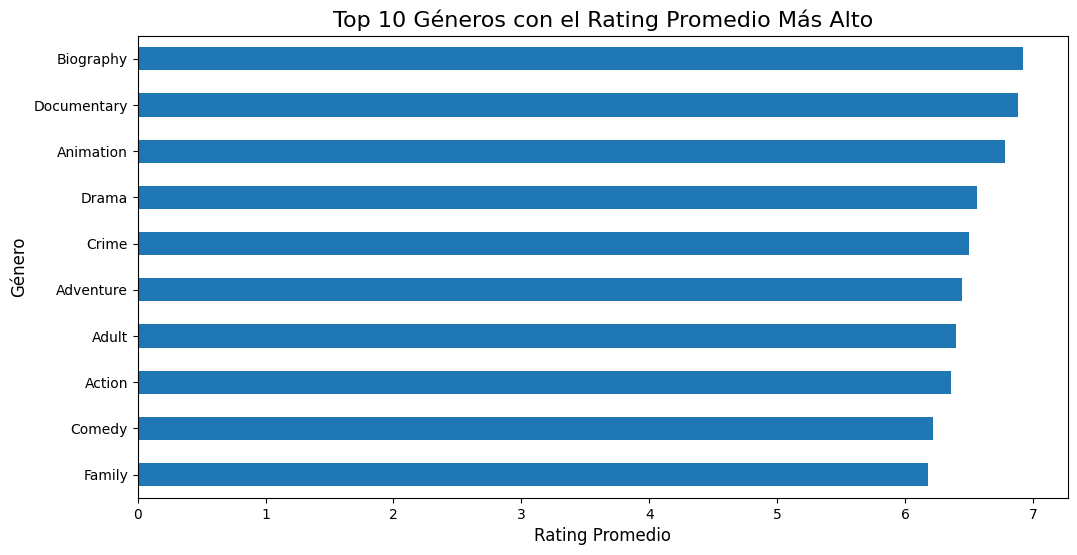

In [112]:
#creamos un gráfico de barras horizontales para los 10 géneros con el rating promedio más alto
promedio_rating_genero.head(10).sort_values(ascending=True).plot(kind="barh", figsize=(12, 6))

plt.title("Top 10 Géneros con el Rating Promedio Más Alto", fontsize=16)
plt.xlabel("Rating Promedio", fontsize=12)
plt.ylabel("Género", fontsize=12)

plt.show()

In [113]:
#calculamos el rating promedio por tipo de contenido
promedio_rating_tipo = df.groupby("type")["imdbAverageRating"].mean()
print(promedio_rating_tipo)

type
movie    6.228762
tv       7.041051
Name: imdbAverageRating, dtype: float64


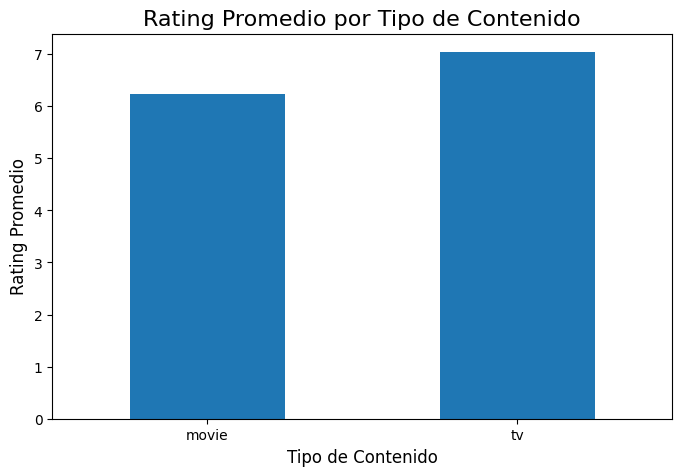

In [114]:
#graficamos el rating promedio por tipo de contenido
promedio_rating_tipo.plot(kind="bar", figsize=(8, 5))

plt.title("Rating Promedio por Tipo de Contenido", fontsize=16)
plt.xlabel("Tipo de Contenido", fontsize=12)
plt.ylabel("Rating Promedio", fontsize=12)
plt.xticks(rotation=0)
plt.show()

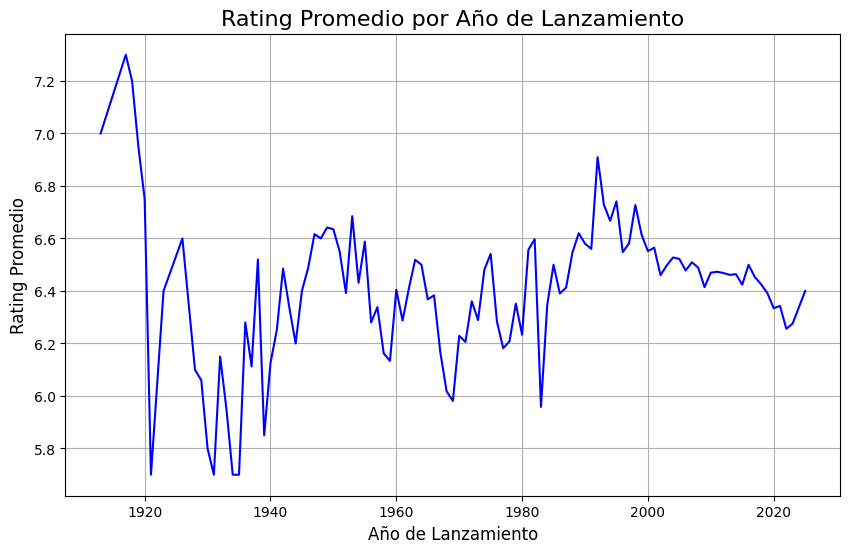

In [115]:
promedio_rating_por_año = df.groupby("releaseYear")["imdbAverageRating"].mean()

plt.figure(figsize=(10, 6))
promedio_rating_por_año.plot(kind="line", color="blue")

plt.title("Rating Promedio por Año de Lanzamiento", fontsize=16)
plt.xlabel("Año de Lanzamiento", fontsize=12)
plt.ylabel("Rating Promedio", fontsize=12)
plt.grid(True)
plt.show()

In [116]:
# Ordenamos por rating y mostramos las 10 películas o series con el rating más alto
top_10_ratings = df.sort_values("imdbAverageRating", ascending=False).head(10)
top_10_ratings[["title", "imdbAverageRating", "genres", "releaseYear"]]

,title,imdbAverageRating,genres,releaseYear
15572,Breaking Bad,9.5,"Crime, Drama, Thriller",2008.0
13167,Ayaanle,9.4,Drama,2022.0
15644,Band of Brothers,9.4,"Action, Drama, History",2001.0
70,The Shawshank Redemption,9.3,Drama,1994.0
17978,Flavours of Romania,9.3,Documentary,2017.0
15546,Avatar: The Last Airbender,9.3,"Action, Adventure, Animation",2005.0
19730,Eddie's Lil' Homies,9.3,"Animation, Comedy, Family",2024.0
15502,Losing Lerato 2,9.3,"Action, Drama, Thriller",2024.0
15360,Mati a Zazzau,9.2,Drama,2020.0
17136,Our Planet,9.2,Documentary,2019.0


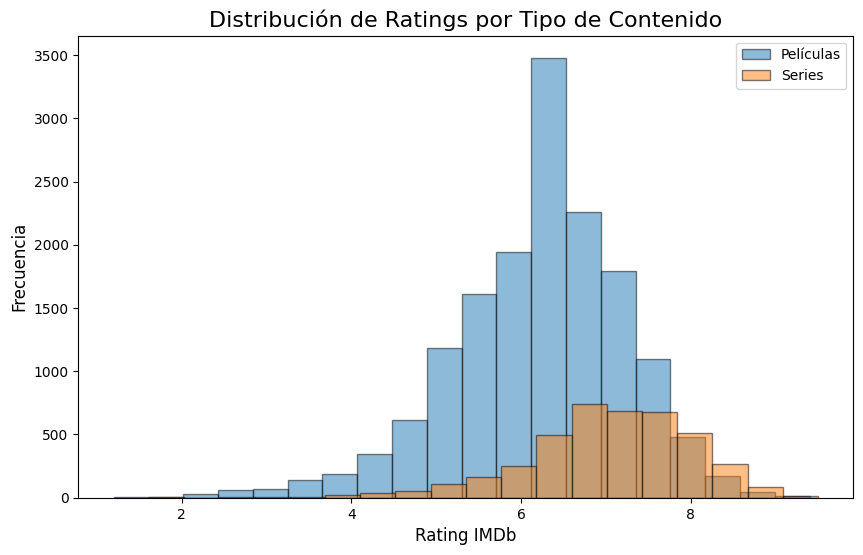

In [117]:
# Graficamos la distribución de ratings por tipo de contenido y género
plt.figure(figsize=(10, 6))
df[df["type"] == "movie"]["imdbAverageRating"].plot(kind="hist", bins=20, alpha=0.5, label="Películas", edgecolor="black")
df[df["type"] == "tv"]["imdbAverageRating"].plot(kind="hist", bins=20, alpha=0.5, label="Series", edgecolor="black")

plt.title("Distribución de Ratings por Tipo de Contenido", fontsize=16)
plt.xlabel("Rating IMDb", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.show()

**CARGAR DF DE OTRAS DOS PLATAFORMAS PARA COMPARAR ALGUNAS COSAS**

In [118]:
netflix_df = df
amazon_df = pd.read_csv(path+"/amazon.csv", sep=",")
hbo_df = pd.read_csv(path+"/hbo.csv", sep=",")

In [119]:
#limpiar amazon de la misma forma que se limpio netflix

amazon_df = amazon_df.drop(["imdbId", "availableCountries"], axis=1)
amazon_df = amazon_df[amazon_df["title"].notnull()]
amazon_df["genres"] = amazon_df["genres"].fillna("Unknown")
median_year_amazon = amazon_df["releaseYear"].median()
amazon_df["releaseYear"] = amazon_df["releaseYear"].fillna(median_year_amazon)
amazon_df["imdbAverageRating"] = amazon_df["imdbAverageRating"].fillna(amazon_df["imdbAverageRating"].mean())
amazon_df["imdbNumVotes"] = amazon_df["imdbNumVotes"].fillna(amazon_df["imdbNumVotes"].mean())

In [120]:
amazon_df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbAverageRating,0
imdbNumVotes,0


In [121]:
#limpiar hbo de la misma forma que se limpio netflix

hbo_df = hbo_df.drop(["imdbId", "availableCountries"], axis=1)
hbo_df = hbo_df[hbo_df["title"].notnull()]
hbo_df["genres"] = hbo_df["genres"].fillna("Unknown")
median_year_hbo = hbo_df["releaseYear"].median()
hbo_df["releaseYear"] = hbo_df["releaseYear"].fillna(median_year_hbo)
hbo_df["imdbAverageRating"] = hbo_df["imdbAverageRating"].fillna(hbo_df["imdbAverageRating"].mean())
hbo_df["imdbNumVotes"] = hbo_df["imdbNumVotes"].fillna(hbo_df["imdbNumVotes"].mean())

In [122]:
hbo_df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbAverageRating,0
imdbNumVotes,0


**EXPLORACION DE LOS 3**

In [123]:
#cantidad de contenidos por plataforma
cantidad_netflix = netflix_df["type"].value_counts()
cantidad_amazon = amazon_df["type"].value_counts()
cantidad_hbo = hbo_df["type"].value_counts()

print(cantidad_netflix)
print(cantidad_amazon)
print(cantidad_hbo)

type
movie    15541
tv        4141
Name: count, dtype: int64
type
movie    59244
tv        7067
Name: count, dtype: int64
type
movie    3694
tv       1850
Name: count, dtype: int64


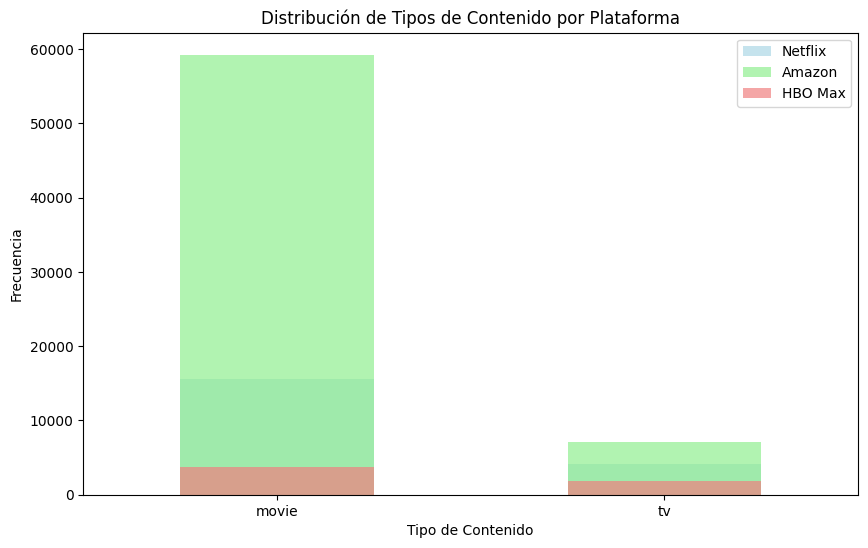

In [124]:
#distribución de tipos de contenido por plataforma
plt.figure(figsize=(10, 6))
cantidad_netflix.plot(kind="bar", color="lightblue", label="Netflix", alpha=0.7)
cantidad_amazon.plot(kind="bar", color="lightgreen", label="Amazon", alpha=0.7)
cantidad_hbo.plot(kind="bar", color="lightcoral", label="HBO Max", alpha=0.7)
plt.title("Distribución de Tipos de Contenido por Plataforma")
plt.xlabel("Tipo de Contenido")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [125]:
#rating promedio por plataforma
promedio_rating_netflix = netflix_df["imdbAverageRating"].mean()
promedio_rating_amazon = amazon_df["imdbAverageRating"].mean()
promedio_rating_hbo = hbo_df["imdbAverageRating"].mean()

print(f"Rating Promedio Netflix: {promedio_rating_netflix}")
print(f"Rating Promedio Amazon: {promedio_rating_amazon}")
print(f"Rating Promedio HBO Max: {promedio_rating_hbo}")

Rating Promedio Netflix: 6.399663713035124
Rating Promedio Amazon: 5.947827538990749
Rating Promedio HBO Max: 6.661255857544517


In [126]:
#cantidad de géneros por plataforma
generos_netflix = netflix_df["genres"].str.split(",", expand=True).stack().str.strip().nunique()
generos_amazon = amazon_df["genres"].str.split(",", expand=True).stack().str.strip().nunique()
generos_hbo = hbo_df["genres"].str.split(",", expand=True).stack().str.strip().nunique()

print(f"Cantidad de géneros en Netflix: {generos_netflix}")
print(f"Cantidad de géneros en Amazon: {generos_amazon}")
print(f"Cantidad de géneros en HBO Max: {generos_hbo}")

Cantidad de géneros en Netflix: 31
Cantidad de géneros en Amazon: 35
Cantidad de géneros en HBO Max: 33


In [127]:
#mediana de votos imdb por plataforma
mediana_votos_netflix = netflix_df["imdbNumVotes"].median()
mediana_votos_amazon = amazon_df["imdbNumVotes"].median()
mediana_votos_hbo = hbo_df["imdbNumVotes"].median()

print(f"Mediana de Votos IMDb en Netflix: {mediana_votos_netflix}")
print(f"Mediana de Votos IMDb en Amazon: {mediana_votos_amazon}")
print(f"Mediana de Votos IMDb en HBO Max: {mediana_votos_hbo}")

Mediana de Votos IMDb en Netflix: 1912.0
Mediana de Votos IMDb en Amazon: 627.0
Mediana de Votos IMDb en HBO Max: 2852.5


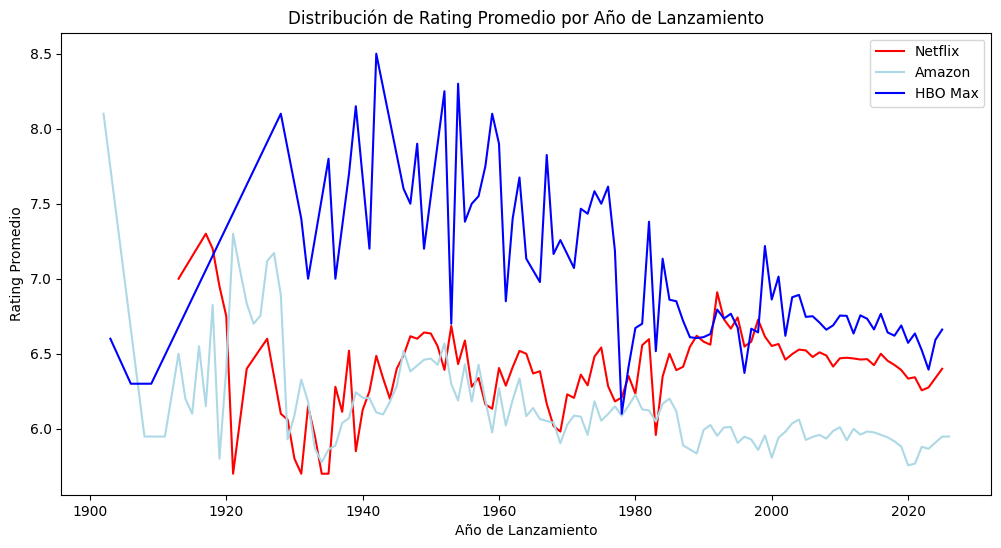

In [128]:
#distribución de calificación por año de lanzamiento
plt.figure(figsize=(12, 6))
netflix_df.groupby("releaseYear")["imdbAverageRating"].mean().plot(kind="line", label="Netflix", color="red")
amazon_df.groupby("releaseYear")["imdbAverageRating"].mean().plot(kind="line", label="Amazon", color="lightblue")
hbo_df.groupby("releaseYear")["imdbAverageRating"].mean().plot(kind="line", label="HBO Max", color="blue")

plt.title("Distribución de Rating Promedio por Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Rating Promedio")
plt.legend()
plt.show()